Mean Squared Error: 0.20157016927321242


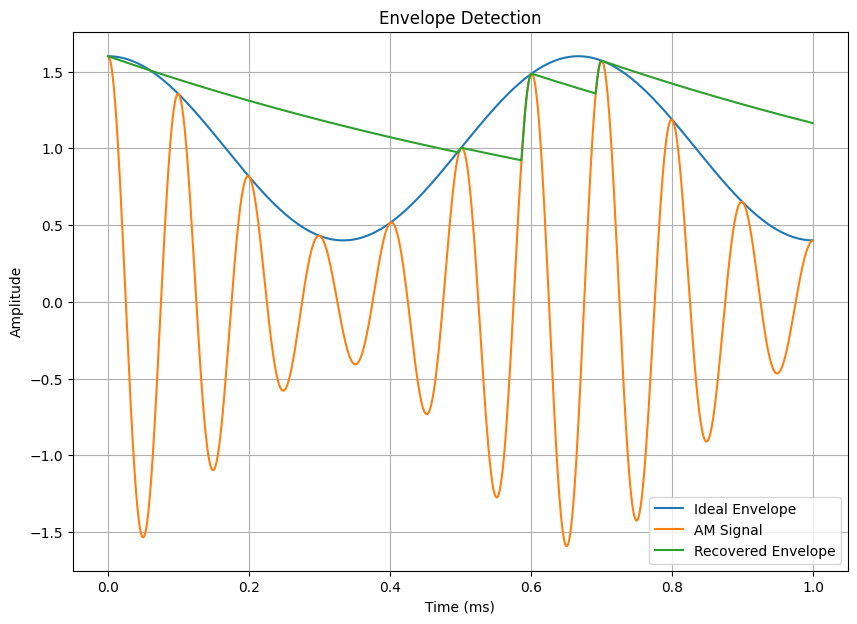

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class EnvelopeDetector:
    def __init__(self, tau: float, Ts: float, fc: float, fm: float, Mu: float, Ac: float):
        self.tau = tau          # Envelope detector time constant
        self.Ts = Ts            # Signal sampling period
        self.fc = fc            # Carrier frequency
        self.fm = fm            # Signal frequency
        self.Mu = Mu            # Modulation index
        self.Ac = Ac            # Carrier amplitude

    def generate_am_signal(self, t: np.ndarray) -> np.ndarray:
        return self.Ac * (1.0 + self.Mu * np.cos(2 * np.pi * self.fm * t)) * np.cos(2 * np.pi * self.fc * t)

    def ideal_envelope(self, t: np.ndarray) -> np.ndarray:
        return np.abs(self.Ac * (1.0 + self.Mu * np.cos(2 * np.pi * self.fm * t)))

    def envelope_detection(self, x_AM: np.ndarray) -> np.ndarray:
        Ns = len(x_AM)
        x_env = np.zeros(Ns)
        out = -1

        for i in range(Ns):
            inp = x_AM[i]
            if inp >= out:
                out = inp  # Case 1: x_am(t) > Vc(t) (capacitor charging)
            else:
                out *= (1 - self.Ts / self.tau)  # Case 2: x_am(t) < Vc(t) (capacitor discharging)
            x_env[i] = out

        return x_env


def main():
    tau = 1e-3
    Ts = 1e-6
    t = np.arange(1000) * Ts
    fc = 10000
    fm = 1500
    Mu = 0.6
    Ac = 1.0

    detector = EnvelopeDetector(tau, Ts, fc, fm, Mu, Ac)

    x_AMo = detector.generate_am_signal(t)
    x_envIdeal = detector.ideal_envelope(t)

    x_AM = x_AMo * (x_AMo > 0)
    x_env = detector.envelope_detection(x_AM)

    mse = np.mean((x_env - x_envIdeal)**2)
    print('Mean Squared Error:', mse)

    plt.figure(1, [10, 7])
    plt.title("Envelope Detection")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (ms)")
    plt.plot(t * 1000, x_envIdeal, label="Ideal Envelope")
    plt.plot(t * 1000, x_AMo, label="AM Signal")
    plt.plot(t * 1000, x_env, label="Recovered Envelope")
    plt.grid()
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()
